<a href="https://colab.research.google.com/github/hemanthkumar17/DL4CV2020/blob/main/DL4V_Assignment_5_Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Welcome to Assignment 5 on Deep Learning for Computer Vision.**
This notebook consists of two parts. In Part-1 you'll have to load pre-trained model and generate captions for a couple of Images, for Part-2 you'll have to implement an encoding layer from scratch. Detailed instructions are provided below

#### **Instructions**
1. Use Python 3.x to run this notebook
2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'.
you should not change anything else in the code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.
3. Read documentation of each function carefully.
4. All the Best!

### Part-1

**Important:** Download `pretrained_model.zip` and `vocap.zip` files into your notebook root folder before you start the assignment. These are share in the following link: https://drive.google.com/drive/folders/12O5lTaofxKHcOlYeEEfzVwidUeEdVdAK?usp=sharing

Extensions like CurlWget (chrome) and cliget(firefox) will be useful for downloading the files directly!

In [ ]:
## Leave this cell untouched!
%%bash
mkdir models
unzip -q pretrained_model.zip -d models
unzip -q vocap.zip -d models
wget http://farm6.staticflickr.com/5540/9036468623_61a0344eab_z.jpg -O image1.jpg
wget http://farm1.staticflickr.com/110/304953668_629cb610c1_z.jpg -O image2.jpg
pip install torchtext

mkdir: cannot create directory ‘models’: File exists
--2020-10-31 13:46:17--  http://farm6.staticflickr.com/5540/9036468623_61a0344eab_z.jpg
Resolving farm6.staticflickr.com (farm6.staticflickr.com)... 13.224.165.164, 2600:9000:2135:de00:0:5a51:64c9:c681, 2600:9000:2135:7800:0:5a51:64c9:c681, ...
Connecting to farm6.staticflickr.com (farm6.staticflickr.com)|13.224.165.164|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm6.staticflickr.com/5540/9036468623_61a0344eab_z.jpg [following]
--2020-10-31 13:46:17--  https://farm6.staticflickr.com/5540/9036468623_61a0344eab_z.jpg
Connecting to farm6.staticflickr.com (farm6.staticflickr.com)|13.224.165.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘image1.jpg’

     0K .......... .......... .......... .......... .......... 3.36M
    50K .......... .......... .......... .......... .......... 4.59M
   100K .......                

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np 
import argparse
import pickle 
import os
from PIL import Image
from torchvision import transforms 
import torch.nn as nn
import torchvision.models as models
from torch.nn.utils.rnn import pack_padded_sequence

## Please DONOT remove these lines. 
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)

In [ ]:
#### YOUR CODE STARTS HERE ####
# Check availability of GPU and set the device accordingly
device = 
#### YOUR CODE ENDS HERE ####

In [ ]:
# this is a simple wrapper for dealing with the vocabulary! 
# this'll be automatically used when you load the provided vocabulary file
class Vocabulary(object):
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [ ]:
class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        #### YOUR CODE STARTS HERE ####
        # load the resnet152 network provided by torchvision
        resnet = 
        # remove the last FC layer in the network
        modules = 
        #define a sequential model with the modules obtained above
        self.resnet = 
        # define a linear layer with out_features as embed_size
        self.linear = 
        # define a 1d batch norm layer with embed_size as the number of features and a momentum of 0.01 
        self.bn = 
        #### YOUR CODE ENDS HERE ####
    def forward(self, images):
        #### YOUR CODE STARTS HERE ####
        # calculate the forward pass in the order of base_model -> linear -> bn
        # reshape features, if necessary
        features = 
        features = 
        features = 
        #### YOUR CODE ENDS HERE ####
        return features


class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=20):
        super(DecoderRNN, self).__init__()
        self.max_seg_length = max_seq_length
        #### YOUR CODE STARTS HERE ####
        # define an embedding layer with vocab_size as the size of the dictionary
        # and embed_size as the size of each embedding
        self.embed =
        # define a LSTM layer with embed_size, hidden_size, num_layers, set batch_first to True
        self.lstm = 
        # define a linear layer with out_features as the vocab size
        self.linear = 
        #### YOUR CODE ENDS HERE ####

    def forward(self, features, captions, lengths):
        #### YOUR CODE STARTS HERE ####
        # get embeddings for the captions
        embeddings = 
        # concatenate the features with embeddings
        embeddings = 
        #### YOUR CODE ENDS HERE ####
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True) 
        hiddens, _ = self.lstm(packed)
        outputs = self.linear(hiddens[0])
        return outputs
    
    def sample(self, features, states=None):
        sampled_ids = []
        inputs = features.unsqueeze(1)
        for i in range(self.max_seg_length):
            hiddens, states = self.lstm(inputs, states)        
            outputs = self.linear(hiddens.squeeze(1))           
            _, predicted = outputs.max(1)                      
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)                       
            inputs = inputs.unsqueeze(1)                        
        sampled_ids = torch.stack(sampled_ids, 1)                
        return sampled_ids

In [ ]:

def main(img_path):
    #### YOUR CODE STARTS HERE ####
    # Image preprocessing
    # define the transforms with normalization values: [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
    transform = 
         # convert to a tensor
         # normalize 
       
    
    # load the vocaulary wrapper file
    vocab = 

    # build encoder with a embed size of 256 (load it in eval model)
    encoder = 
    # build decoder with embed_size of 256, hidden_size of 512, vocab_size, 1 layer
    decoder = 
    encoder = encoder.to(device)
    decoder = decoder.to(device)
    
    # load the pre-trained weights for encoder and decoder

    
    #### YOUR CODE ENDS HERE ####

    image = Image.open(img_path).convert('RGB')
    image = image.resize([224, 224], Image.LANCZOS)
    image = transform(image).unsqueeze(0)
    image_tensor = image.to(device)
    
    feature = encoder(image_tensor)
    sampled_ids = decoder.sample(feature)
    sampled_ids = sampled_ids[0].cpu().numpy()
    
    sampled_caption = []
    for word_id in sampled_ids:
        word = vocab.idx2word[word_id]
        sampled_caption.append(word)
        if word == '<end>':
            break
    sentence = ' '.join(sampled_caption)
    
    print (sentence)
    image = Image.open(img_path)
    plt.imshow(np.asarray(image))

<start> a bus that is parked in a parking lot . <end>


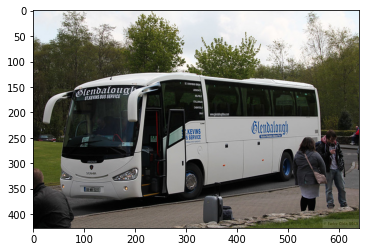

In [ ]:
main('image1.jpg')

#### Question-1

Pick the caption displayed for image1.jpg
1. a parked bus
2. bus that is parked
3. a bus that is parked in a parking lot 
4. a bus with a few people

<start> a group of people standing around a table with a bunch of bananas . <end>


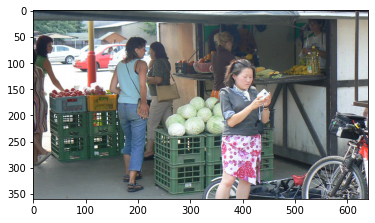

In [ ]:
main('image2.jpg')

#### Question-2

Pick the caption displayed for image2.jpg
1. a group of people standing around a table with a bunch of bananas 
2. a group of people standing around a table with a bunch of cabbages 
3. market place with a few people
4. a group of people standing around a table 

### Part-2

This part is based on official PyTorch tutorial [Sequence-to-sequence modeling with nn.Transformer and TorchText](https://pytorch.org/tutorials/beginner/transformer_tutorial.html). Unlike the tutorial you'll have to code the encoding layer from scratch.

**Note:**  We use a different set of hyper-parameters from the ones used in tutorial, ensure you only use the code in this notebook while reporting the answers

In [ ]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
## Please DONOT remove these lines. 
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)

In [ ]:
class CustomEncoderLayer(nn.Module):
    def __init__(self, d_model, nhead, dim_feedforward=128, dropout=0.1, activation="relu"):
        super(CustomEncoderLayer, self).__init__()
        #### YOUR CODE STARTS HERE ####
        # define a multi head attention layer d_model, nhead and dropout
        self.self_attn = 
        # define a linear layer with 256 as the number of output features
        self.linear1 =
        # define a dropout layer using the passed value
        self.dropout = 
       # define a linear layer with dim_feedforward as the number of output features
        self.linear2 = 
        # define a linear layer with d_model as the number of output features
        self.linear3 = 
        # define a normalization layer (not batch and instance norm) with d_model as the normalized shape
        self.norm1 = 
        # define a normalization layer (not batch and instance norm) with d_model as the normalized shape
        self.norm2 = 
        # define a dropout layer using the passed value
        self.dropout1 = 
        # define a dropout layer using the passed value
        self.dropout2 = 
        #### YOUR CODE ENDS HERE ####
        self.activation = nn.ReLU()
        
    def forward(self, src, src_mask, src_key_padding_mask):

        src2 = self.self_attn(src, src, src, attn_mask=src_mask,
                              key_padding_mask=src_key_padding_mask)[0]
        #### YOUR CODE STARTS HERE ####
        # use dropout1 of src2 and to src
        src = 
        # use the norm1 layer on src
        src = 
        # use linear1 on src along with activation
        src2 = 
        # use dropout on src2
        src2 = 
        # use linear2 on src2 along with activation
        src2 = 
        # use linear3 on src2
        src2 = 
        # use dropout2 on src2 and add it to src
        src =
        # use norm2 on src
        src = 
        #### YOUR CODE ENDS HERE ####
        return src

In [ ]:
class TransformerModel(nn.Module):

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5):
        super(TransformerModel, self).__init__()
        from torch.nn import TransformerEncoder, TransformerEncoderLayer
        self.model_type = 'Transformer'
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = CustomEncoderLayer(ninp, nhead, nhid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, src_mask):
        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

In [ ]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

In [ ]:
import torchtext
from torchtext.data.utils import get_tokenizer
TEXT = torchtext.data.Field(tokenize=get_tokenizer("spacy"),
                            init_token='<sos>',
                            eos_token='<eos>',
                            lower=True)
train_txt, val_txt, test_txt = torchtext.datasets.WikiText2.splits(TEXT)
TEXT.build_vocab(train_txt)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def batchify(data, bsz):
    data = TEXT.numericalize([data.examples[0].text])
    # Divide the dataset into bsz parts.
    nbatch = data.size(0) // bsz
    # Trim off any extra elements that wouldn't cleanly fit (remainders).
    data = data.narrow(0, 0, nbatch * bsz)
    # Evenly divide the data across the bsz batches.
    data = data.view(bsz, -1).t().contiguous()
    return data.to(device)

batch_size = 20
eval_batch_size = 10
train_data = batchify(train_txt, batch_size)
val_data = batchify(val_txt, eval_batch_size)
test_data = batchify(test_txt, eval_batch_size)

In [ ]:
bptt = 35
def get_batch(source, i):
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len].reshape(-1)
    return data, target

In [ ]:
ntokens = len(TEXT.vocab.stoi) # the size of vocabulary
emsize = 100 # embedding dimension
nhid = 100 # the dimension of the feedforward network model in nn.TransformerEncoder
nlayers = 1 # the number of nn.TransformerEncoderLayer in nn.TransformerEncoder
nhead = 2 # the number of heads in the multiheadattention models
dropout = 0.2 # the dropout value
model = TransformerModel(ntokens, emsize, nhead, nhid, nlayers, dropout).to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
lr = 1.0 # learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

import time
def train():
    model.train() # Turn on the train mode
    total_loss = 0.
    start_time = time.time()
    ntokens = len(TEXT.vocab.stoi)
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    for batch, i in enumerate(range(0, train_data.size(0) - 1, bptt)):
        data, targets = get_batch(train_data, i)
        optimizer.zero_grad()
        if data.size(0) != bptt:
            src_mask = model.generate_square_subsequent_mask(data.size(0)).to(device)
        output = model(data, src_mask)
        loss = criterion(output.view(-1, ntokens), targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        log_interval = 200
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  'lr {:02.2f} | ms/batch {:5.2f} | '
                  'loss {:5.2f} | ppl {:8.2f}'.format(
                    epoch, batch, len(train_data) // bptt, scheduler.get_lr()[0],
                    elapsed * 1000 / log_interval,
                    cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()

def evaluate(eval_model, data_source):
    eval_model.eval() # Turn on the evaluation mode
    total_loss = 0.
    ntokens = len(TEXT.vocab.stoi)
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    with torch.no_grad():
        for i in range(0, data_source.size(0) - 1, bptt):
            data, targets = get_batch(data_source, i)
            if data.size(0) != bptt:
                src_mask = model.generate_square_subsequent_mask(data.size(0)).to(device)
            output = eval_model(data, src_mask)
            output_flat = output.view(-1, ntokens)
            total_loss += len(data) * criterion(output_flat, targets).item()
    return total_loss / (len(data_source) - 1)

In [ ]:
best_val_loss = float("inf")
epochs = 5 # The number of epochs
best_model = None

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train()
    val_loss = evaluate(model, val_data)
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.2f} | '
          'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model

    scheduler.step()


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:351: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


| epoch   1 |   200/ 3195 batches | lr 1.00 | ms/batch 10.91 | loss  6.85 | ppl   945.09
| epoch   1 |   400/ 3195 batches | lr 1.00 | ms/batch 10.63 | loss  6.32 | ppl   556.91
| epoch   1 |   600/ 3195 batches | lr 1.00 | ms/batch 10.67 | loss  6.13 | ppl   460.50
| epoch   1 |   800/ 3195 batches | lr 1.00 | ms/batch 10.65 | loss  6.01 | ppl   408.08
| epoch   1 |  1000/ 3195 batches | lr 1.00 | ms/batch 10.64 | loss  6.02 | ppl   413.63
| epoch   1 |  1200/ 3195 batches | lr 1.00 | ms/batch 10.66 | loss  5.98 | ppl   393.57
| epoch   1 |  1400/ 3195 batches | lr 1.00 | ms/batch 10.69 | loss  5.88 | ppl   359.30
| epoch   1 |  1600/ 3195 batches | lr 1.00 | ms/batch 10.72 | loss  5.77 | ppl   320.02
| epoch   1 |  1800/ 3195 batches | lr 1.00 | ms/batch 10.73 | loss  5.81 | ppl   332.05
| epoch   1 |  2000/ 3195 batches | lr 1.00 | ms/batch 10.75 | loss  5.80 | ppl   330.51
| epoch   1 |  2200/ 3195 batches | lr 1.00 | ms/batch 10.76 | loss  5.73 | ppl   309.07
| epoch   1 |  2400/ 

#### Question-3

Report the final validation loss displayed above (If you are not getting the exact number shown in options, please report the closest number).
1. 4.83
2. 7.62
3. 1.47
4. 9.15